<a href="https://colab.research.google.com/github/JoseTayllan/Aprendizado-de-maquina.py/blob/main/Aprendizado_de_maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nota prevista para 6 horas de estudo: 5.35


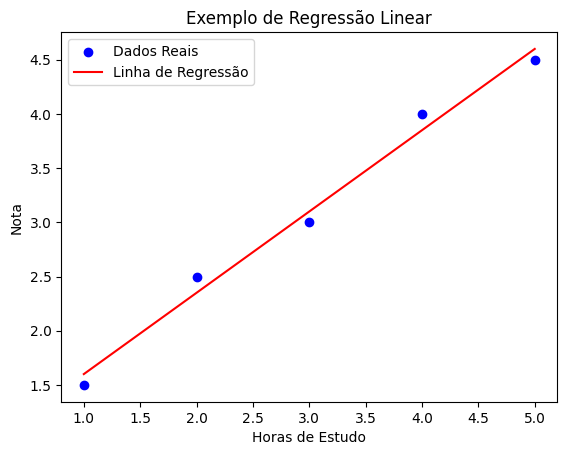

In [ ]:
# Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dados de exemplo: Horas de estudo (X) e notas obtidas (y)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Horas de estudo
y = np.array([1.5, 2.5, 3.0, 4.0, 4.5])      # Notas obtidas

# Criando o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X, y)  # Treinamento do modelo com os dados

# Fazendo uma previsão para 6 horas de estudo
nota_prevista = modelo.predict([[6]])
print(f"Nota prevista para 6 horas de estudo: {nota_prevista[0]:.2f}")

# Plotando os dados e a linha de regressão
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X, modelo.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota')
plt.legend()
plt.title('Exemplo de Regressão Linear')
plt.show()


In [ ]:
import gym
import numpy as np
import random
from collections import defaultdict

# Inicializando o ambiente CartPole
env = gym.make("CartPole-v1")

# Parâmetros do Q-Learning
alpha = 0.1       # Taxa de aprendizado
gamma = 0.99      # Fator de desconto
epsilon = 1.0     # Fator de exploração (probabilidade de escolher ação aleatória)
epsilon_decay = 0.995  # Decaimento do epsilon
min_epsilon = 0.01

# Tabela Q inicializada como dicionário
q_table = defaultdict(float)

# Função para escolher uma ação com base em uma política epsilon-greedy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Escolher ação aleatória
    else:
        q_values = [q_table[(state, a)] for a in range(env.action_space.n)]
        return np.argmax(q_values)  # Escolher melhor ação

# Treinamento do agente
num_episodes = 1000
rewards = []

for episode in range(num_episodes):
    state = env.reset()  # Estado inicial
    state = tuple(state)  # Converter para formato hashable
    total_reward = 0
    done = False

    while not done:
        # Escolher ação
        action = choose_action(state, epsilon)

        # Executar a ação no ambiente
        next_state, reward, done, _ = env.step(action)
        next_state = tuple(next_state)

        # Atualização da Tabela Q
        best_next_action = np.argmax([q_table[(next_state, a)] for a in range(env.action_space.n)])
        td_target = reward + gamma * q_table[(next_state, best_next_action)] * (1 - done)
        td_error = td_target - q_table[(state, action)]
        q_table[(state, action)] += alpha * td_error

        state = next_state
        total_reward += reward

    # Atualizar epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

    # Exibir progresso a cada 100 episódios
    if (episode + 1) % 100 == 0:
        print(f"Episódio {episode + 1}: Recompensa média dos últimos 100 episódios: {np.mean(rewards[-100:])}")

print("Treinamento concluído!")



Episódio 100: Recompensa média dos últimos 100 episódios: 18.72
Episódio 200: Recompensa média dos últimos 100 episódios: 12.8
Episódio 300: Recompensa média dos últimos 100 episódios: 11.37
Episódio 400: Recompensa média dos últimos 100 episódios: 10.25
Episódio 500: Recompensa média dos últimos 100 episódios: 9.82
Episódio 600: Recompensa média dos últimos 100 episódios: 9.62
Episódio 700: Recompensa média dos últimos 100 episódios: 9.49
Episódio 800: Recompensa média dos últimos 100 episódios: 9.52
Episódio 900: Recompensa média dos últimos 100 episódios: 9.62
Episódio 1000: Recompensa média dos últimos 100 episódios: 9.4
Treinamento concluído!


##Aprendizado Supervisionado:
* Exemplo: Classificação com K-Nearest Neighbors (KNN).

###Aprendizado Supervisionado: Classificação com K-Nearest Neighbors

* Este exemplo usa KNN, que é um algoritmo supervisionado de classificação.
* Os dados têm rótulos (as espécies de flores).
* O modelo aprende a associar características às classes.


Célula 1: Importação e Configuração do Dataset

In [ ]:
# Importando bibliotecas necessárias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregando o dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Célula 2: Treinamento e Avaliação do Modelo

In [ ]:
# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN: {accuracy * 100:.2f}%")


Acurácia do KNN: 100.00%


Célula 3: Exemplificando Previsões

In [ ]:
# Mostrando exemplos de previsões
for i in range(5):
    print(f"Entrada: {X_test[i]}, Classe real: {y_test[i]}, Classe prevista: {y_pred[i]}")


Entrada: [6.1 2.8 4.7 1.2], Classe real: 1, Classe prevista: 1
Entrada: [5.7 3.8 1.7 0.3], Classe real: 0, Classe prevista: 0
Entrada: [7.7 2.6 6.9 2.3], Classe real: 2, Classe prevista: 2
Entrada: [6.  2.9 4.5 1.5], Classe real: 1, Classe prevista: 1
Entrada: [6.8 2.8 4.8 1.4], Classe real: 1, Classe prevista: 1


##Aprendizado Não Supervisionado: Agrupamento com K-Means

* O K-Means não supervisionado agrupa dados em dois clusters.
* Não há rótulos, o algoritmo encontra padrões por conta própria.

###Célula 1: Criação dos Dados

In [ ]:
# Importando bibliotecas
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Criando dados fictícios (sem rótulos)
X = np.array([
    [1, 2], [1, 4], [1, 0],
    [4, 2], [4, 4], [4, 0]
])


###Célula 2: Aplicação do Algoritmo K-Means

In [ ]:
# Aplicando K-Means com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Mostrando os resultados
print("Rótulos dos clusters:", labels)
print("Centroides dos clusters:", kmeans.cluster_centers_)


Rótulos dos clusters: [1 0 1 0 0 0]
Centroides dos clusters: [[3.25 2.5 ]
 [1.   1.  ]]


###Célula 3: Visualização dos Clusters

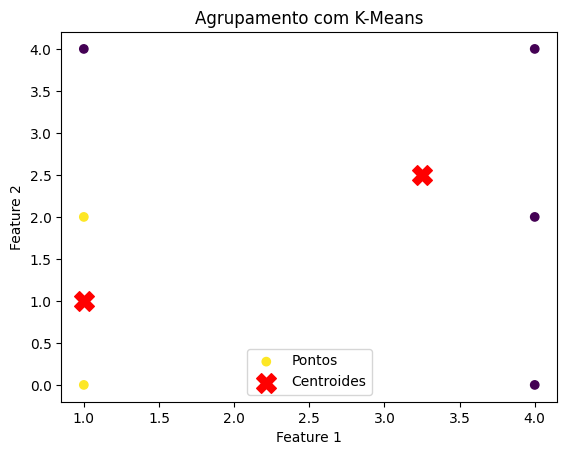

In [ ]:
# Visualizando os clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Pontos')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Agrupamento com K-Means")
plt.legend()
plt.show()


##Aprendizado por Reforço: Q-Learning em um Ambiente Simples

* Este exemplo simula um ambiente com 4 estados.
* O agente aprende qual ação tomar em cada estado para maximizar sua recompensa.
* Q-Learning é um algoritmo de reforço popular.

###Célula 1: Definição do Ambiente e Inicialização

In [ ]:
import numpy as np

# Definindo o ambiente (um grid simples de 4 estados)
# Estado 0: Início | Estado 3: Meta
# Ações: [0: Esquerda, 1: Direita]
states = 4
actions = 2
q_table = np.zeros((states, actions))

# Definindo recompensas (chegar ao estado 3 é recompensado)
rewards = [-1, -1, -1, 10]  # -1 para transições normais, 10 ao atingir o estado final

# Parâmetros de aprendizado
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1  # Exploração vs Exploração


###Célula 2: Função para Escolher Ação e Treinamento

In [ ]:
# Função para escolher a ação
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)  # Exploração
    else:
        return np.argmax(q_table[state])  # Exploração (ação com maior Q-valor)

# Treinamento
episodes = 100
for episode in range(episodes):
    state = 0  # Começar no estado inicial
    while state != 3:  # Loop até atingir o estado final
        action = choose_action(state)
        next_state = state + (1 if action == 1 else -1)  # Direita ou Esquerda
        next_state = max(0, min(states - 1, next_state))  # Garantir que o estado é válido

        # Atualizar a Q-tabela
        reward = rewards[next_state]
        q_table[state, action] += learning_rate * (
            reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action]
        )
        state = next_state


###Célula 3: Resultados Finais e Teste

In [ ]:
# Exibindo a tabela Q
print("Tabela Q final:")
print(q_table)

# Testando a política
state = 0
print("\nPolítica de navegação:")
while state != 3:
    action = np.argmax(q_table[state])
    print(f"Estado: {state}, Ação: {'Direita' if action == 1 else 'Esquerda'}")
    state = state + (1 if action == 1 else -1)


Tabela Q final:
[[1.38610757 6.19005948]
 [1.39713033 7.99802058]
 [3.19642298 9.99973439]
 [0.         0.        ]]

Política de navegação:
Estado: 0, Ação: Direita
Estado: 1, Ação: Direita
Estado: 2, Ação: Direita


<ipython-input-7-08b19af31e71>:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_plot[:, 0], X_test_plot[:, 1], c=y_test_plot, edgecolor='k', cmap=ListedColormap(cmap_bold), marker='x', label='Teste')


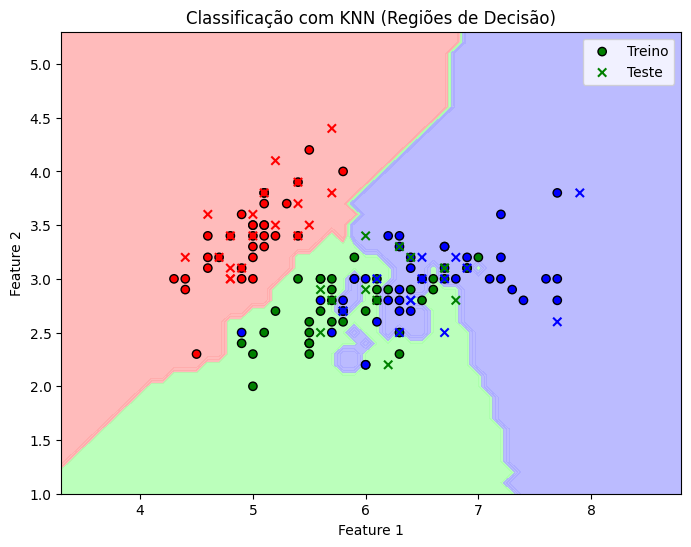

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

# Dados Iris para visualização (apenas as duas primeiras características para simplificação)
X_plot = iris.data[:, :2]  # Duas primeiras colunas do dataset Iris
y_plot = iris.target  # Rótulos

# Dividindo os dados em treino e teste
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y_plot, test_size=0.3, random_state=42)

# Treinando o modelo KNN com os dados reduzidos
knn.fit(X_train_plot, y_train_plot)

# Definindo os limites do gráfico
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prevendo para cada ponto na grade
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizando as regiões de decisão
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

# Plotando os dados de treino e teste
plt.scatter(X_train_plot[:, 0], X_train_plot[:, 1], c=y_train_plot, edgecolor='k', cmap=ListedColormap(cmap_bold), label='Treino')
plt.scatter(X_test_plot[:, 0], X_test_plot[:, 1], c=y_test_plot, edgecolor='k', cmap=ListedColormap(cmap_bold), marker='x', label='Teste')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classificação com KNN (Regiões de Decisão)')
plt.legend()
plt.show()


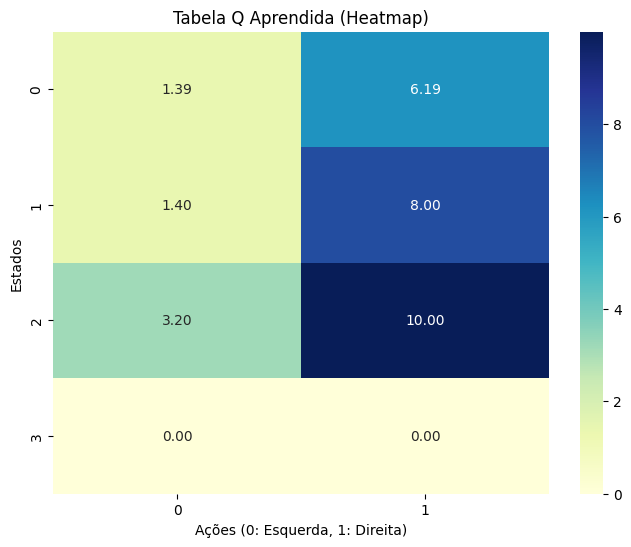

In [ ]:
import seaborn as sns

# Criando um heatmap para visualizar a tabela Q
plt.figure(figsize=(8, 6))
sns.heatmap(q_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Tabela Q Aprendida (Heatmap)')
plt.xlabel('Ações (0: Esquerda, 1: Direita)')
plt.ylabel('Estados')
plt.show()
